# **ORGANISATION D'EXAMENS ET OPTIMISATION DE LA RÉPARTITION DES MATIÈRES PAR CRÉNEAUX**

## **A. SOURCE DES DONNÉES**
Trois cas pour la source des données:
* dans un fichier CSV en local (environnement Jupyter)
* dans un fichier CSV en ligne
* dans un fichier Google Sheets partagé

### **Cas 1: Fichier CSV en local**
* Créer un nouveau tableur avec le logiciel de votre choix
* Importer dans ce tableur la liste des élèves et de leurs spécialités (depuis Pronote par exemple)
* Organiser les données pour avoir quatre colonnes: `nom`, `classe`, `matiere_1` et `matiere_2` (la première ligne doit comporter ces titres)
* Enregistrer ce fichier au format CSV
* Importer le fichier CSV en local dans le panneau de gauche et indiquer son nom dans la cellule "CAS 1".

### **Cas 2: Fichier CSV en ligne**
* Créer un nouveau tableur avec le logiciel de votre choix
* Importer dans ce tableur la liste des élèves et de leurs spécialités (depuis Pronote par exemple)
* Organiser les données pour avoir quatre colonnes: `nom`, `classe`, `matiere_1` et `matiere_2` (la première ligne doit comporter ces titres)
* Enregistrer ce fichier au format CSV
* Placer le fichier CSV sur internet et indiquer son adresse dans la cellule "CAS 2".

### **Cas 3: Fichier Google Sheets partagé**
**a. Creation du fichier**
* Créer un nouveau tableur Google Sheets
* Importer dans ce tableur la liste des élèves et de leurs spécialités (depuis Pronote par exemple)
* Organiser les données pour avoir quatre colonnes: `nom`, `classe`, `matiere_1` et `matiere_2` (la première ligne doit comporter ces titres)
* Utiliser différentes feuilles pour faire des essais
* Partager ce tableur avec un lien

**b. Récupération de "tableur_id" et "feuille_id"**

L'adresse du tableur est de la forme: `https://docs.google.com/spreadsheets/d/tableur_id/edit#gid=feuille_id`
* Récupérer l'identifiant du tableur ("tableur_id") et le coller dans la cellule "Cas 3"
* Récupérer l'identifiant de la feuille du tableur à traiter ("feuille_id") et le coller dans la cellule "CAS 3"


## **B. TRAITEMENT DES DONNÉES**

Exécuter les cellules ci-dessous.

**1 - BIBLIOTHÈQUES ET INITIALISATION**

In [ ]:
# @title Bibliothèques

"""
@auteurs
Frédéric Junier:
 * https://framapiaf.org/@fjunier
 * https://twitter.com/fjunier
 * https://github.com/frederic-junier/
 * https://frederic-junier.org/
Laurent Abbal:
 * https://mastodon.social/@laurentabbal
 * https://twitter.com/laurentabbal
 * https://github.com/laurentabbal/
 * https://www.ateliernumerique.net/

 @licence: GPLv3 (https://www.gnu.org/licenses/gpl-3.0.html)
"""

# on installe les bibliotheques
!pip install networkx
!pip install numpy
!pip install scipy
!pip install matplotlib

# on importe les bibliotheques
import csv
import sys
import requests
import networkx as nx
import io

# on initialise les variables
fichier = ""
adresse = ""
tableur_id = ""
feuille_id = ""

**2 - COMPLÉTER ET EXÉCUTER LA CELLULE CAS 1, CAS 2 OU CAS 3 SELON VOTRE CAS**

In [ ]:
# CAS 1 - Fichier CSV en local
fichier = ""

In [34]:
# CAS 2 - Fichier CSV en ligne
adresse = "https://forge.apps.education.fr/laurent.abbal/organisation-examens/-/raw/main/data_exemple.csv"

In [ ]:
# CAS 3 - Fichier Google Sheets partagé
tableur_id = ""
feuille_id = ""

**3 - CRÉATION DU GRAPHE**

Nombre minimum de créneaux: 4


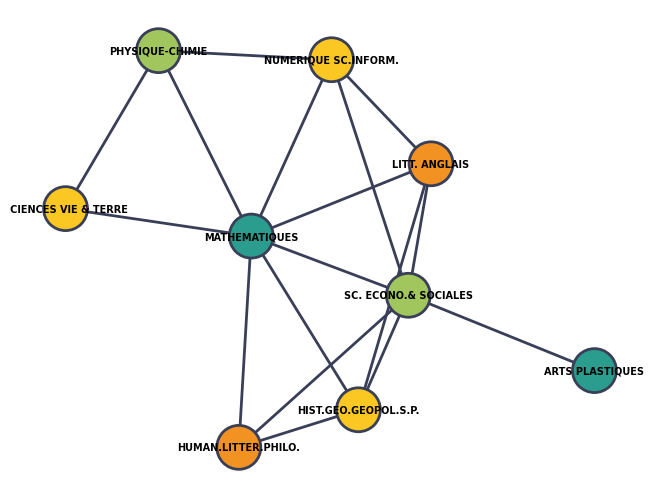

In [35]:
# @title Graphe

# on recupere les donnees selon les cas
eleves = {}
if fichier:
    eleves = csv.DictReader(open(fichier, mode="r", encoding="utf8", newline=""))
elif adresse:
    response = requests.get(adresse)
    response.encoding = 'UTF-8'
    csv_data = io.StringIO(response.text)
    eleves = csv.DictReader(csv_data)
elif tableur_id and feuille_id:
    response = requests.get(f"https://docs.google.com/spreadsheets/d/{tableur_id}/export?gid={feuille_id}&format=csv")
    response.encoding = 'UTF-8'
    csv_data = io.StringIO(response.text)
    eleves = csv.DictReader(csv_data)
else:
    print("Vous devez compléter et exécuter la cellule CAS 1, CAS 2 ou CAS 3")


if eleves:
    # on cree le graphe et la liste des eleves
    graphe = {}
    liste_eleves = []
    for eleve in eleves:
        matiere_1 = eleve["matiere_1"]
        matiere_2 = eleve["matiere_2"]
        liste_eleves.append([eleve["nom"], eleve["classe"], matiere_1, matiere_2])
        if matiere_1 == "" or matiere_2 == "":
            print(eleve)
        if matiere_1 not in graphe:
            graphe[matiere_1] = {matiere_2}
        else:
            graphe[matiere_1].add(matiere_2)
        if matiere_2 not in graphe:
            graphe[matiere_2] = {matiere_1}
        else:
            graphe[matiere_2].add(matiere_1)

    # on cree le graphe networkx
    G = nx.Graph()
    for spe in graphe:
        G.add_node(spe)

    for matiere_1 in graphe:
        for matiere_2 in graphe[matiere_1]:
            G.add_edge(matiere_1, matiere_2)

    # on essaye toutes les strategies et on garde la meilleure
    coloration = {}
    coef_chromatique = 1000
    strategies = ["largest_first", "random_sequential", "smallest_last", "independent_set", "connected_sequential_bfs", "connected_sequential_dfs", "connected_sequential", "DSATUR"]
    for strategie in strategies:
        strategie_coloration = nx.greedy_color(G, strategy=strategie)
        strategie_coef_chromatique = max(strategie_coloration[spe] for spe in strategie_coloration) + 1
        if strategie_coef_chromatique < coef_chromatique:
            coloration = strategie_coloration
            coef_chromatique = strategie_coef_chromatique
    print("Nombre minimum de créneaux: " + str(coef_chromatique))

    # on affiche le graphe avec les couleurs
    couleurs = ["#2a9d8f","#a1c65d","#fac723","#f29222","#e95e50","#936fac"]
    couleurs_noeuds = [couleurs[coloration[node]] for node in G]
    nx.draw(G, node_color=couleurs_noeuds, with_labels=True,  font_size=7, pos=nx.kamada_kawai_layout(G), font_weight='bold', node_size=1000, node_shape="o", font_color="black", edgecolors='#3A3F58', edge_color='#3A3F58', width=2, linewidths=2)


**4 - CRÉATION DES LISTES POUR LES CRÉNEAUX ET LES MATIÈRES**

In [36]:
# @title Créneaux et matières

from IPython.display import display, HTML

coloration_matieres = dict(sorted(coloration.items(), key=lambda item: item[1]))
creneaux = {}
for i, v in coloration_matieres.items():
    creneaux[v] = [i] if v not in creneaux.keys() else creneaux[v] + [i]

# TABLEAU 1
T1 = '<table style="border-collapse: collapse;">'
for creneau in creneaux:
    eleves_creneau = [eleve for eleve in liste_eleves for m in creneaux[creneau] if m in eleve]
    T1 += '<tr><td style="font-weight:bold;color:#2980b9;border:1px solid #7f8c8d;padding:4px;">CRÉNEAU ' + str(creneau + 1 ) + '</td><td style="font-weight:bold;color:#2980b9;border:1px solid #7f8c8d;padding:4px;">' + str(len(eleves_creneau)) + '</td></tr>'
    for matiere in creneaux[creneau]:
        eleves_matiere = [eleve for eleve in liste_eleves if matiere in eleve]
        T1 += '<tr><td style="border:1px solid #7f8c8d;padding:4px;">' + matiere + '</td><td style="border:1px solid #7f8c8d;padding:4px;">' + str(len(eleves_matiere)) + '</td></tr>'
T1 += '</table>'
display(HTML(T1))


**5 - CRÉATION DES LISTES POUR LES CRÉNEAUX, LES MATIÈRES ET LES ÉLÈVES**

In [37]:
# @title Créneaux, matières et élèves

# TABLEAU 2
T2 = '<table style="border-collapse: collapse;">'
for creneau in creneaux:
    eleves_creneau = [eleve for eleve in liste_eleves for m in creneaux[creneau] if m in eleve]
    T2 += '<tr><td style="font-weight:bold;color:#2980b9;font-size:150%;padding-top:20px;">CRÉNEAU ' + str(creneau + 1 ) + ' - ' + str(len(eleves_creneau)) + ' élèves</td><td></td><td></td><td></td></tr>'
    for matiere in creneaux[creneau]:
        eleves_matiere = [eleve for eleve in liste_eleves if matiere in eleve]
        T2 += '<tr><td style="font-weight:bold;padding-top:10px;">' + matiere + ' - ' + str(len(eleves_matiere)) + ' élèves</td><td></td><td></td><td></td></tr>'
        for eleve_matiere in eleves_matiere:
            T2 += '<tr><td style="border:1px solid #7f8c8d;padding:4px;">' + eleve_matiere[0] + '</td><td style="border:1px solid #7f8c8d;padding:4px;">' + eleve_matiere[1] + '</td><td style="border:1px solid #7f8c8d;padding:4px;">' + eleve_matiere[2] + '</td><td style="border:1px solid #7f8c8d;padding:4px;">' + eleve_matiere[3] + '</td></tr>'
T2 += '</table>'
display(HTML(T2))
